# Basic Instructions

1. Enter your Name and UID in the provided space.
2. Do the assignment in the notebook itself.
3. You are free to use Google Colab.
4. Upload to Google Drive.
5. Now enter the Google Drive link in the provided space. (you can do this by opening the iPython notebook uploaded using Google Collab).
6. Submit the assignment to Gradescope.

**Note** - You are NOT supposed to use Pytorch library for this assignment. You will receive no credit anywhere that Pytorch (or TF, caffe, etc.) is used. Additionally, we don't use cuda here, so you can use the CPU runtime in Colab  -- no need for GPU. 


Name:  **Name Here**  
UID:  **UID Here**

Link to Google Drive : **Link Here (make sure it works)**

# Part 1: Building a 2-layer Neural Network

In the first part, you will implement all the functions required to build a two layer neural network.
In the next part, you will use these functions for image and text classification. Provide your code at the appropriate placeholders.

## Packages

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import re

## 1. Layer Initialization

**Exercise:** Create and initialize the parameters of the 2-layer neural network. Use random initialization for the weight matrices (use `0.01*np.random.randn()` ) and zero initialization for the biases. 

In [120]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = 0.01 * np.random.randn(n_h, n_x)
    b1 = 0.01 * np.zeros((n_h, 1))
    W2 = 0.01 * np.random.randn(n_y, n_h)
    b2 = 0.01 * np.zeros((n_y, 1))
    ### END CODE HERE ###
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [121]:
parameters = initialize_parameters(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]


**Expected output**:
       
<table style="width:80%">
  <tr>
    <td> **W1** </td>
    <td> [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]] </td> 
  </tr>

  <tr>
    <td> **b1**</td>
    <td>[[ 0.]
 [ 0.]]</td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[ 0.01744812 -0.00761207]]</td>
  </tr>
  
  <tr>
    <td> **b2** </td>
    <td> [[ 0.]] </td> 
  </tr>
  
</table>

## 2. Forward Propagation

Now that you have initialized your parameters, you will do the forward propagation module. You will start by implementing some basic functions that you will use later when implementing the model. You will complete three functions in this order:

- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid.

The linear module computes the following equation:

$$Z = WA+b\tag{4}$$

### 2.1 Exercise - Build the linear part of forward propagation.

In [122]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = W @ A + b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [123]:
np.random.seed(1)

A = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]


**Expected output**:

<table style="width:35%">
  
  <tr>
    <td> **Z** </td>
    <td> [[ 3.26295337 -1.23429987]] </td> 
  </tr>
  
</table>

### 2.2 - Linear-Activation Forward

In this notebook, you will use two activation functions:

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. Write the code for the `sigmoid` function. This function returns **two** items: the activation value "`a`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call: 
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$. Write the code for the  `relu` function. This function returns **two** items: the activation value "`A`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call:
``` python
A, activation_cache = relu(Z)

**Exercise**: 
- Implement the activation functions
- Build the linear activation part of forward propagation. Mathematical relation is: $A = g(Z) = g(WA_{prev} +b)$

In [124]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z, useful during backpropagation
    """
    ### START CODE HERE ### (≈ 2 line of code)
    A = 1 / (1 + np.exp(-Z))
    
    ### END CODE HERE ###
    
    return A, Z

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache --  returns Z, useful during backpropagation
    """
    
    ### START CODE HERE ### (≈ 2 line of code)
    A = np.where(Z > 0, Z, 0)
    
    ### END CODE HERE ###
    
    assert(A.shape == Z.shape) 
    return A, Z

In [125]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [126]:
np.random.seed(2)
A_prev = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


**Expected output**:
       
<table style="width:35%">
  <tr>
    <td> **With sigmoid: A ** </td>
    <td > [[ 0.96890023  0.11013289]]</td> 
  </tr>
  <tr>
    <td> **With ReLU: A ** </td>
    <td > [[ 3.43896131  0.        ]]</td> 
  </tr>
</table>


## 3. Loss function

Now you will implement forward and backward propagation. You need to compute the loss, because you want to check if your model is actually learning.

**Exercise**: Compute the cross-entropy loss $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{ (i)}\right) + (1-y^{(i)})\log\left(1- a^{(i)}\right)) \tag{7}$$

In [127]:
# GRADED FUNCTION: compute_loss

def compute_loss(A, Y):
    """
    Implement the loss function defined by equation (7).

    Arguments:
    A -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    loss -- cross-entropy loss
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    loss =  -(Y * np.log(A) + (1 - Y) * np.log(1 - A)).sum() / m
    ### END CODE HERE ###
    
    loss = np.squeeze(loss)      # To make sure your loss's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(loss.shape == ())
    
    return loss

In [128]:
Y = np.asarray([[1, 1, 1]])
A = np.array([[.8,.9,0.4]])

print("loss = " + str(compute_loss(A, Y)))

loss = 0.414931599615397


**Expected Output**:

<table>
    <tr>
    <td>**loss** </td>
    <td> 0.41493159961539694</td> 
    </tr>
</table>

## 4. Backward propagation module

Just like with forward propagation, you will implement helper functions for backpropagation. Remember that back propagation is used to calculate the gradient of the loss function with respect to the parameters. 

Now, similar to forward propagation, you are going to build the backward propagation in two steps:
- LINEAR backward
- LINEAR -> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU or sigmoid activation


Following are the relationships - 
\begin{align}
dA_{prev} &= W^{T}dZ\\
dW &= dZ A_{prev}^{T} \\
db &= \sum_{i=1}^m dZ^{(i)} \: \text{       where m is the number of samples} \\
    &= dZ \hat I \: \text{    where $\hat I$ is a column vector of size(m,1) with all entries 1 }
\end{align}

### 4.1 - Linear backward

In [129]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the loss with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the loss with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the loss with respect to W (current layer l), same shape as W
    db -- Gradient of the loss with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    dA_prev = W.T @ dZ
    dW = dZ @ A_prev.T
    db = dZ @ np.ones((m,1))
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [130]:
np.random.seed(1)
dZ = np.random.randn(1,2)
A = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)
linear_cache = (A, W, b)

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.2015379   2.81370193  3.2998501 ]]
db = [[1.01258895]]


**Expected Output**: 

<table style="width:90%">
  <tr>
    <td> **dA_prev** </td>
    <td > [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]] </td> 
  </tr> 
    <tr>
        <td> **dW** </td>
        <td > [[-0.2015379   2.81370193  3.2998501 ]] </td> 
    </tr> 
    <tr>
        <td> **db** </td>
        <td> [[1.01258895]] </td> 
    </tr>     
</table>

### 4.2 - Linear Activation backward

Next, you will create a function that merges the two helper functions: **`linear_backward`** and the backward step for the activation **`linear_activation_backward`**. 

Before implementing `linear_activation_backward`, you need to implement two backward functions for each activations:
- **`sigmoid_backward`**: Implements the backward propagation for SIGMOID unit. You can call it as follows:

```python
dZ = sigmoid_backward(dA, activation_cache)
```

- **`relu_backward`**: Implements the backward propagation for RELU unit. You can call it as follows:

```python
dZ = relu_backward(dA, activation_cache)
```

If $g(.)$ is the activation function, 
`sigmoid_backward` and `relu_backward` compute $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$$.  

**Exercise**: 
- Implement the backward functions for the relu and sigmoid activation layer.
- Implement the backpropagation for the *LINEAR->ACTIVATION* layer.

In [131]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the loss with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    ### START CODE HERE ### (≈ 1 line of code)
    dZ *= np.where(Z > 0, 1, 0)
    ### END CODE HERE ###
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the loss with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True)
    
    ### START CODE HERE ### (≈ 2 line of code)
    dZ *= np.exp(-Z) / (1 + np.exp(-Z))**2
    ### END CODE HERE ###
    
    assert (dZ.shape == Z.shape)
    
    return dZ


In [132]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the loss with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the loss with respect to W (current layer l), same shape as W
    db -- Gradient of the loss with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
    
    return dA_prev, dW, db

In [133]:
np.random.seed(2)
dA = np.random.randn(1,2)
A = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)
Z = np.random.randn(1,2)
linear_cache = (A, W, b)
activation_cache = Z
linear_activation_cache = (linear_cache, activation_cache)

dA_prev, dW, db = linear_activation_backward(dA, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dA, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.20533573  0.19557101 -0.03936168]]
db = [[-0.11459244]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.89027649  0.74742835 -0.20957978]]
db = [[-0.41675785]]


**Expected output with sigmoid:**

<table style="width:100%">
  <tr>
    <td > dA_prev </td> 
           <td >[[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]] </td> 
  </tr> 
    <tr>
    <td > dW </td> 
           <td > [[ 0.20533573  0.19557101 -0.03936168]] </td> 
  </tr> 
    <tr>
    <td > db </td> 
           <td > [[-0.11459244]] </td> 
  </tr> 
</table>

**Expected output with relu:**

<table style="width:100%">
  <tr>
    <td > dA_prev </td> 
           <td > [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]] </td> 
  </tr> 
    <tr>
    <td > dW </td> 
           <td > [[ 0.89027649  0.74742835 -0.20957978]] </td> 
  </tr> 
    <tr>
    <td > db </td> 
           <td > [[-0.41675785]] </td> 
  </tr> 
</table>

## 5. Update Parameters

In this section you will update the parameters of the model, using gradient descent: 

$$ W^{[1]} = W^{[1]} - \alpha \text{ } dW^{[1]} \tag{16}$$
$$ b^{[1]} = b^{[1]} - \alpha \text{ } db^{[1]} \tag{17}$$
$$ W^{[2]} = W^{[2]} - \alpha \text{ } dW^{[2} \tag{16}$$
$$ b^{[2]} = b^{[2]} - \alpha \text{ } db^{[2]} \tag{17}$$

where $\alpha$ is the learning rate. After computing the updated parameters, store them in the parameters dictionary. 

**Exercise**: Implement `update_parameters()` to update your parameters using gradient descent.

**Instructions**:
Update parameters using gradient descent.


In [134]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 4 lines of code)
    parameters['W1'] -= learning_rate * grads['dW1']
    parameters['b1'] -= learning_rate * grads['db1']
    parameters['W2'] -= learning_rate * grads['dW2']
    parameters['b2'] -= learning_rate * grads['db2']
    ### END CODE HERE ###
    return parameters

In [135]:
np.random.seed(2)
W1 = np.random.randn(3,4)
b1 = np.random.randn(3,1)
W2 = np.random.randn(1,3)
b2 = np.random.randn(1,1)
parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2}
np.random.seed(3)
dW1 = np.random.randn(3,4)
db1 = np.random.randn(3,1)
dW2 = np.random.randn(1,3)
db2 = np.random.randn(1,1)
grads = {"dW1": dW1,
         "db1": db1,
         "dW2": dW2,
         "db2": db2}
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


**Expected Output**:

<table style="width:100%"> 
    <tr>
    <td > W1 </td> 
           <td > [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]] </td> 
  </tr> 
    <tr>
    <td > b1 </td> 
           <td > [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]] </td> 
  </tr> 
  <tr>
    <td > W2 </td> 
           <td > [[-0.55569196  0.0354055   1.32964895]]</td> 
  </tr> 
    <tr>
    <td > b2 </td> 
           <td > [[-0.84610769]] </td> 
  </tr> 
</table>



## Conclusion

Congrats on implementing all the functions required for building a deep neural network! 

If this was challenging, that means you're learning. Also, the next part of the assignment is easier. 



# Part 2: Image Classification with a 2-layer Neural Network

In the next part you will put all these together to build a two-layer neural networks for image classification.

In [136]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset

**Problem Statement**: You are given a dataset ("data/train_catvnoncat.h5", "data/test_catvnoncat.h5") containing:
    - a training set of m_train images labelled as cat (1) or non-cat (0)
    - a test set of m_test images labelled as cat and non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).

Let's get more familiar with the dataset. Load the data by completing the function and run the cell below.

In [137]:
def load_data(train_file, test_file):
    # Load the training data
    train_dataset = h5py.File(train_file, 'r')
    
    # Separate features(x) and labels(y) for training set
    train_set_x_orig = np.array(train_dataset['train_set_x'])
    train_set_y_orig = np.array(train_dataset['train_set_y'])

    # Load the test data
    test_dataset = h5py.File(test_file, 'r')

    # Separate features(x) and labels(y) for training set
    test_set_x_orig = np.array(test_dataset['test_set_x'])
    test_set_y_orig = np.array(test_dataset['test_set_y'])

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [138]:
train_file="data/train_catvnoncat.h5"
test_file="data/test_catvnoncat.h5"
train_x_orig, train_y, test_x_orig, test_y, classes = load_data(train_file, test_file)

The following code will show you an image in the dataset. Feel free to change the index and re-run the cell multiple times to see other images. 

y = 0. It's a non-cat picture.


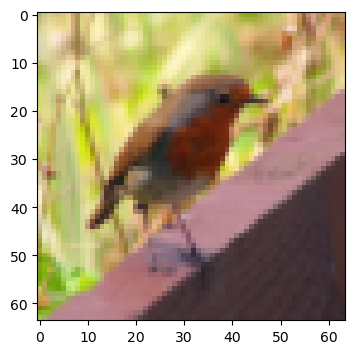

In [139]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [140]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


As usual, you reshape and standardize the images before feeding them to the network.

<img src="imvectorkiank.png" style="width:450px;height:300px;">

<caption><center> <u>Figure 1</u>: Image to vector conversion. <br> </center></caption>

In [141]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


## Architecture

Now that you are familiar with the dataset, it is time to build a deep neural network to distinguish cat images from non-cat images.

###  2-layer neural network

<img src="2layerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 2</u>: 2-layer neural network. <br> The model can be summarized as: ***INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT***. </center></caption>

<u>Detailed Architecture of figure 2</u>:
- The input is a (64,64,3) image which is flattened to a vector of size $(12288,1)$. 
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ of size $(n^{[1]}, 12288)$.
- You then add a bias term and take its relu to get the following vector: $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.
- You multiply the resulting vector by $W^{[2]}$ and add your intercept (bias). 
- Finally, you take the sigmoid of the result. If it is greater than 0.5, you classify it to be a cat.


##  General methodology

As usual you will follow the Deep Learning methodology to build the model:
    1. Initialize parameters / Define hyperparameters
    2. Loop for num_iterations:
        a. Forward propagation
        b. Compute loss function
        c. Backward propagation
        d. Update parameters (using parameters, and grads from backprop) 
    4. Use trained parameters to predict labels

Let's now implement those the model!

In [142]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

## 6. Training a Neural Network

**Exercise**:  Use the helper functions you have implemented in the previous assignment to build a 2-layer neural network with the following structure: *LINEAR -> RELU -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_loss(AL, Y):
    ...
    return loss
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```


In [143]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_loss=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_loss -- If set to True, this will print the loss every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    losses = []                              # to keep track of the loss
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(*layers_dims)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        ### END CODE HERE ###
        
        # Compute loss
        ### START CODE HERE ### (≈ 1 line of code)
        loss = compute_loss(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2)) / m
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        ### END CODE HERE ###
        
        # Set grads['dW1'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        ### START CODE HERE ### (≈ 4 lines of code)
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        ### END CODE HERE ###
        
    
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the loss every 100 training example
        if print_loss and i % 100 == 0:
            print("Loss after iteration {}: {}".format(i, np.squeeze(loss)))
        if print_loss and i % 100 == 0:
            losses.append(loss)
       
    # plot the loss

    plt.plot(np.squeeze(losses))
    plt.ylabel('loss')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.6464320953428849
Loss after iteration 200: 0.6325140647912677
Loss after iteration 300: 0.6015024920354666
Loss after iteration 400: 0.5601966311605748
Loss after iteration 500: 0.515830477276473
Loss after iteration 600: 0.4754901313943325
Loss after iteration 700: 0.4339163151225749
Loss after iteration 800: 0.40079775362038866
Loss after iteration 900: 0.35807050113237976
Loss after iteration 1000: 0.3394281538366412
Loss after iteration 1100: 0.30527536361962654
Loss after iteration 1200: 0.2749137728213016
Loss after iteration 1300: 0.24681768210614827
Loss after iteration 1400: 0.19850735037466108
Loss after iteration 1500: 0.17448318112556663
Loss after iteration 1600: 0.1708076297809611
Loss after iteration 1700: 0.1130652456216474
Loss after iteration 1800: 0.09629426845937157
Loss after iteration 1900: 0.08342617959726864
Loss after iteration 2000: 0.07439078704319085
Loss after iteration 2100: 0.066307481

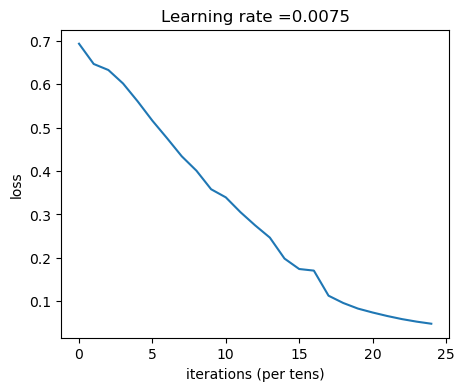

In [144]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_loss=True)

**Expected Output**:
<table> 
    <tr>
        <td> **Loss after iteration 0**</td>
        <td> 0.6930497356599888 </td>
    </tr>
    <tr>
        <td> **Loss after iteration 100**</td>
        <td> 0.6464320953428849 </td>
    </tr>
    <tr>
        <td> **...**</td>
        <td> ... </td>
    </tr>
    <tr>
        <td> **Loss after iteration 2400**</td>
        <td> 0.048554785628770206 </td>
    </tr>
</table>

Good thing you built a vectorized implementation! Otherwise it might have taken 10 times longer to train this.

Now, you can use the trained parameters to classify images from the dataset. 

## 7. Inference for Your Neural Network

***Exercise:*** 
- Implement the forward function
- Implement the predict function below to make prediction on test_images

In [145]:
def two_layer_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    A2 -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2
    
    # Implement LINEAR -> RELU. Add "cache" to the "caches" list.
    ### START CODE HERE ### (approx. 3 line of code)
    for i in range(1, L):
        A, cache = linear_activation_forward(A, parameters[f'W{i}'], parameters[f'b{i}'], 'relu')
        caches.append(cache)
    ### END CODE HERE ###

    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (approx. 3 line of code)
    A2, cache = linear_activation_forward(A, parameters[f'W{L}'], parameters[f'b{L}'], 'sigmoid')
    ### END CODE HERE ###

    assert(A2.shape == (1,X.shape[1]))
            
    return A2, caches

In [152]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    ### START CODE HERE ### (≈ 1 lines of code)
    probas, caches =  two_layer_forward(X, parameters)
    ### END CODE HERE ###
    
    # convert probas to 0/1 predictions
    ### START CODE HERE ### (≈ 1 lines of code)
    p = probas.round()
    ### END CODE HERE ###
    
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [153]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [154]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


In [63]:
def learning_rate_tuning(values):
    train_accs = []
    test_accs = []
    for value in values:
        print(f"lr: {value}\n")
        parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_loss=True, learning_rate=value)
        train_accs.append(np.sum((predict(train_x, train_y, parameters) == train_y) / train_y.shape[1]))
        test_accs.append(np.sum((predict(test_x, test_y, parameters) == test_y) / test_y.shape[1]))
    plt.plot(values, train_accs, '-', color='blue', label='train')
    plt.plot(values, test_accs, '-', color='red', label='test')
    plt.legend()
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy %')
    plt.xscale('log')

def hlayer_size_tuning(values):
    train_accs = []
    test_accs = []
    for value in values:
        print(f"n_h: {value}\n")
        parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, value, n_y), num_iterations = 2500, print_loss=True)
        train_accs.append(np.sum((predict(train_x, train_y, parameters) == train_y) / train_y.shape[1]))
        test_accs.append(np.sum((predict(test_x, test_y, parameters) == test_y) / test_y.shape[1]))
    plt.plot(values, train_accs, '-', color='blue', label='train')
    plt.plot(values, test_accs, '-', color='red', label='test')
    plt.legend()
    plt.xlabel('Hidden Layer Size')
    plt.ylabel('Accuracy %')

def iterations_tuning(values):
    train_accs = []
    test_accs = []
    for value in values:
        print(f"Iterations: {value}\n")
        parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = value, print_loss=True)
        train_accs.append(np.sum((predict(train_x, train_y, parameters) == train_y) / train_y.shape[1]))
        test_accs.append(np.sum((predict(test_x, test_y, parameters) == test_y) / test_y.shape[1]))
    plt.plot(values, train_accs, '-', color='blue', label='train')
    plt.plot(values, test_accs, '-', color='red', label='test')
    plt.legend()
    plt.xlabel('Num of Iterations')
    plt.ylabel('Accuracy %')
    plt.xscale('log')

lr: 0.001

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.6871285593700678
Loss after iteration 200: 0.6774598051623522
Loss after iteration 300: 0.6634445540984449
Loss after iteration 400: 0.653406449142838
Loss after iteration 500: 0.6497904438777808
Loss after iteration 600: 0.6482590766515223
Loss after iteration 700: 0.6470075388502676
Loss after iteration 800: 0.6457232357854561
Loss after iteration 900: 0.6443487075230296
Loss after iteration 1000: 0.6428518731444728
Loss after iteration 1100: 0.6412012953366911
Loss after iteration 1200: 0.63936112360304
Loss after iteration 1300: 0.637293088000609
Loss after iteration 1400: 0.6349568709624164
Loss after iteration 1500: 0.6323129013403661
Loss after iteration 1600: 0.6293121017256724
Loss after iteration 1700: 0.6259374641319518
Loss after iteration 1800: 0.6221682969966916
Loss after iteration 1900: 0.6179891560731461
Loss after iteration 2000: 0.6133980197213095
Loss after iteration 2100: 0.6086187085

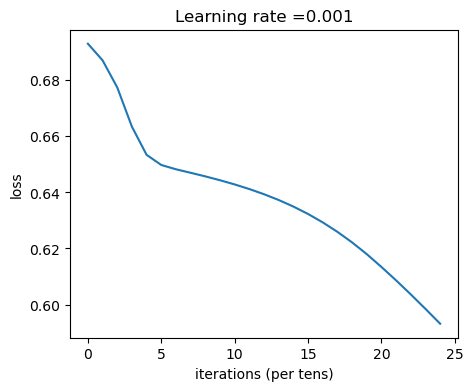

Accuracy: 0.6555023923444976
Accuracy: 0.3400000000000001
lr: 0.0025

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.67071684376141
Loss after iteration 200: 0.6497994166739874
Loss after iteration 300: 0.6463876792041281
Loss after iteration 400: 0.6428713007049935
Loss after iteration 500: 0.6383881969805719
Loss after iteration 600: 0.6323595267295943
Loss after iteration 700: 0.6241722747853798
Loss after iteration 800: 0.6134867738294383
Loss after iteration 900: 0.6011399546492744
Loss after iteration 1000: 0.5878637594993404
Loss after iteration 1100: 0.5741915691420071
Loss after iteration 1200: 0.5597687123974394
Loss after iteration 1300: 0.5454489613440154
Loss after iteration 1400: 0.5305707083169804
Loss after iteration 1500: 0.5152282811707948
Loss after iteration 1600: 0.5003316597513212
Loss after iteration 1700: 0.48548750272867663
Loss after iteration 1800: 0.47057542942654756
Loss after iteration 1900: 0.45550561260730665
Loss after iteration 

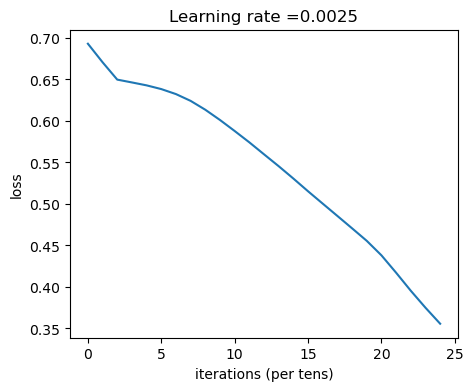

Accuracy: 0.8995215311004783
Accuracy: 0.7000000000000001
lr: 0.005

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.6498146945800299
Loss after iteration 200: 0.642903321799465
Loss after iteration 300: 0.632436270457728
Loss after iteration 400: 0.6136341404900737
Loss after iteration 500: 0.5880555621796613
Loss after iteration 600: 0.5599851489962856
Loss after iteration 700: 0.5307962533608093
Loss after iteration 800: 0.5006868866557079
Loss after iteration 900: 0.47133623511575123
Loss after iteration 1000: 0.4414796692901524
Loss after iteration 1100: 0.39649483244432243
Loss after iteration 1200: 0.3574656133376948
Loss after iteration 1300: 0.321981610690753
Loss after iteration 1400: 0.29085007437578875
Loss after iteration 1500: 0.26593129929541653
Loss after iteration 1600: 0.2404998060168952
Loss after iteration 1700: 0.22517010213699934
Loss after iteration 1800: 0.2066630019500281
Loss after iteration 1900: 0.1871853269434654
Loss after iteration 

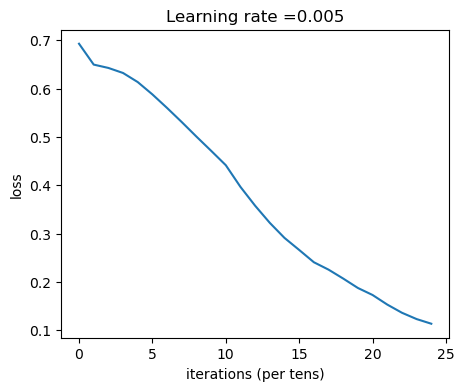

Accuracy: 0.9760765550239232
Accuracy: 0.72
lr: 0.0075

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.6464320953428849
Loss after iteration 200: 0.6325140647912677
Loss after iteration 300: 0.6015024920354666
Loss after iteration 400: 0.5601966311605748
Loss after iteration 500: 0.515830477276473
Loss after iteration 600: 0.4754901313943325
Loss after iteration 700: 0.4339163151225749
Loss after iteration 800: 0.40079775362038866
Loss after iteration 900: 0.35807050113237976
Loss after iteration 1000: 0.3394281538366412
Loss after iteration 1100: 0.30527536361962654
Loss after iteration 1200: 0.2749137728213016
Loss after iteration 1300: 0.24681768210614827
Loss after iteration 1400: 0.19850735037466108
Loss after iteration 1500: 0.17448318112556663
Loss after iteration 1600: 0.1708076297809611
Loss after iteration 1700: 0.1130652456216474
Loss after iteration 1800: 0.09629426845937157
Loss after iteration 1900: 0.08342617959726864
Loss after iteration 2000: 0.

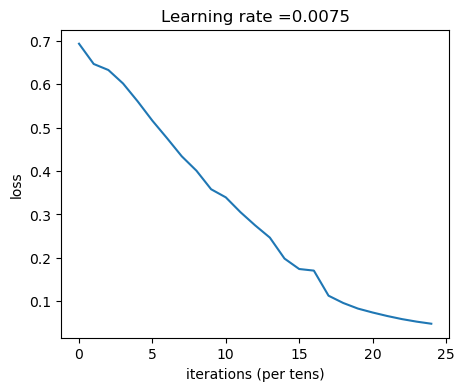

Accuracy: 0.9999999999999998
Accuracy: 0.72
lr: 0.01

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.6429673956634753
Loss after iteration 200: 0.6139330587122018
Loss after iteration 300: 0.5603909238662338
Loss after iteration 400: 0.5030563524628465
Loss after iteration 500: 0.4698443892342188
Loss after iteration 600: 0.4355621445123246
Loss after iteration 700: 0.40986977972092903
Loss after iteration 800: 0.3703324586925943
Loss after iteration 900: 0.28012549813890303
Loss after iteration 1000: 0.29654878488824155
Loss after iteration 1100: 0.19625387983520973
Loss after iteration 1200: 0.35529332447208617
Loss after iteration 1300: 0.15117073173355386
Loss after iteration 1400: 0.12822053502639758
Loss after iteration 1500: 0.10367329243705388
Loss after iteration 1600: 0.09337081956364975
Loss after iteration 1700: 0.08626919003764866
Loss after iteration 1800: 0.06430869400356994
Loss after iteration 1900: 0.05547815049723402
Loss after iteration 2000:

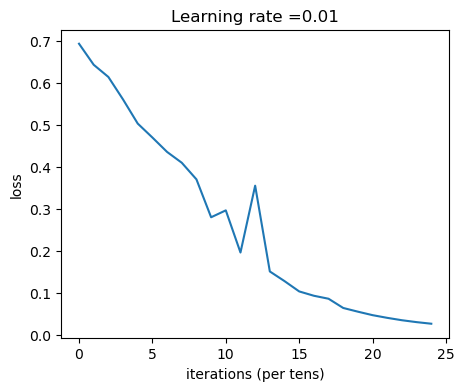

Accuracy: 0.9999999999999998
Accuracy: 0.72
lr: 0.02

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.6145315364650428
Loss after iteration 200: 0.5488114210847703
Loss after iteration 300: 0.5058825075279193
Loss after iteration 400: 0.4856951678386853
Loss after iteration 500: 0.40482437202493576
Loss after iteration 600: 0.27326788322218476
Loss after iteration 700: 0.3007301473240635
Loss after iteration 800: 0.1732883830848622
Loss after iteration 900: 0.1654462050269189
Loss after iteration 1000: 0.1143851440752048
Loss after iteration 1100: 0.10549148318407764
Loss after iteration 1200: 0.07744948881795996
Loss after iteration 1300: 0.055641953848746546
Loss after iteration 1400: 0.03271076562300076
Loss after iteration 1500: 0.02468853844651104
Loss after iteration 1600: 0.01962430272251674
Loss after iteration 1700: 0.016117497705623672
Loss after iteration 1800: 0.013570001240693774
Loss after iteration 1900: 0.0116069282955571
Loss after iteration 2000

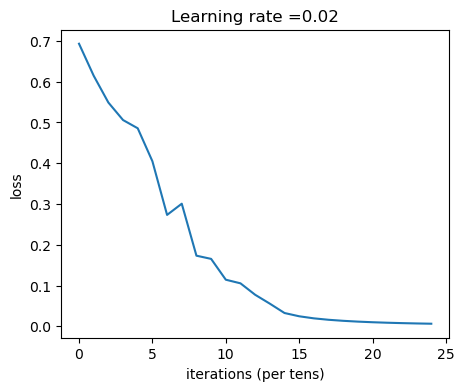

Accuracy: 0.9999999999999998
Accuracy: 0.7
lr: 0.05

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.577454469968822
Loss after iteration 200: 0.5294729506708399
Loss after iteration 300: 0.48965477391823975
Loss after iteration 400: 0.32662000021904974
Loss after iteration 500: 0.27118641944150457
Loss after iteration 600: 0.33431351851147134
Loss after iteration 700: 0.3212072579924682
Loss after iteration 800: 0.19931624295604605
Loss after iteration 900: 0.2990744816379517
Loss after iteration 1000: 0.35024983873924254
Loss after iteration 1100: 0.36713323224297745
Loss after iteration 1200: 0.26189548426853615
Loss after iteration 1300: 0.28480263956483476
Loss after iteration 1400: 0.19017748217839592
Loss after iteration 1500: 0.5542341288945067
Loss after iteration 1600: 0.07533514067270054
Loss after iteration 1700: 0.05745157414371193
Loss after iteration 1800: 0.04686149657582028
Loss after iteration 1900: 0.03584594255856
Loss after iteration 2000: 0.

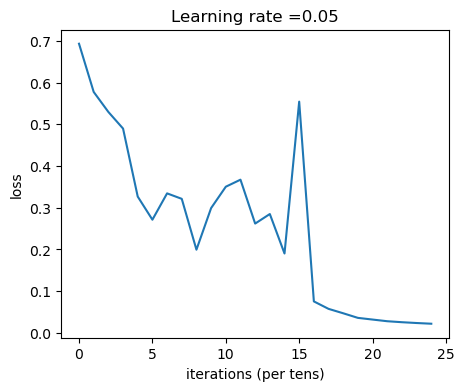

Accuracy: 0.9999999999999998
Accuracy: 0.66
lr: 0.075

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.6159811750972887
Loss after iteration 200: 0.6008384836529405
Loss after iteration 300: 0.41014576405034003
Loss after iteration 400: 0.4130265395764807
Loss after iteration 500: 0.6559669951566486
Loss after iteration 600: 0.42295980514527415
Loss after iteration 700: 0.2602957879465793
Loss after iteration 800: 0.4003163111493723
Loss after iteration 900: 0.4222553976602595
Loss after iteration 1000: 0.31258134222302253
Loss after iteration 1100: 0.35619848175452884
Loss after iteration 1200: 0.3952147474648204
Loss after iteration 1300: 0.2837386201366396
Loss after iteration 1400: 0.2698260377207461
Loss after iteration 1500: 0.2670917982647515
Loss after iteration 1600: 0.26639375257542064
Loss after iteration 1700: 0.2654310824788673
Loss after iteration 1800: 0.26533734510403706
Loss after iteration 1900: 0.2651500277236691
Loss after iteration 2000: 0.26

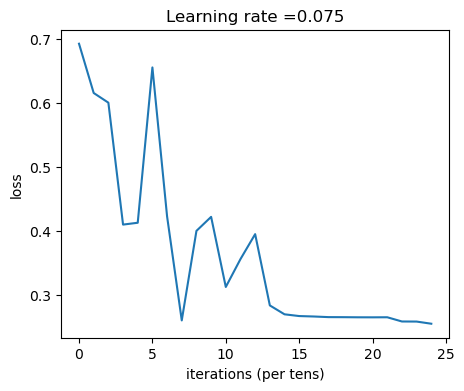

Accuracy: 0.9425837320574161
Accuracy: 0.7
lr: 0.1

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.631900410181424
Loss after iteration 200: 0.6532018168340253
Loss after iteration 300: 0.6045647129016016
Loss after iteration 400: 0.5067079816941581
Loss after iteration 500: 0.502061723360744
Loss after iteration 600: 0.488869832787068
Loss after iteration 700: 0.6068899666044961
Loss after iteration 800: 0.4612511577232928
Loss after iteration 900: 0.4929003947754196
Loss after iteration 1000: 0.6117183573283915
Loss after iteration 1100: 0.48491557538137553
Loss after iteration 1200: 0.5450842950941343
Loss after iteration 1300: 0.40474746476748175
Loss after iteration 1400: 0.612545562901251
Loss after iteration 1500: 0.6342084503599155
Loss after iteration 1600: 0.41128323602869504
Loss after iteration 1700: 0.5459414539942865
Loss after iteration 1800: 0.37145070894697846
Loss after iteration 1900: 0.4199089318369411
Loss after iteration 2000: 0.35326583150

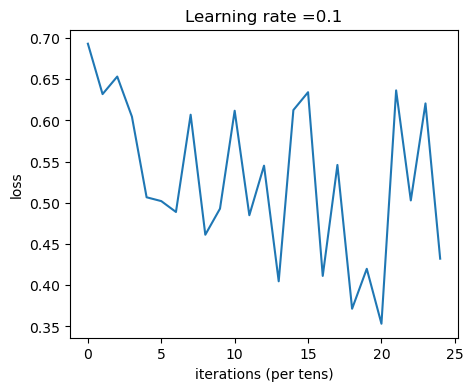

Accuracy: 0.8708133971291865
Accuracy: 0.6600000000000001
lr: 0.2

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.6149748517230992
Loss after iteration 200: 0.6361994903384335
Loss after iteration 300: 0.630613742069503
Loss after iteration 400: 0.6749407260454529
Loss after iteration 500: 0.643976229030803
Loss after iteration 600: 0.6439737382933965
Loss after iteration 700: 0.6439737380528291
Loss after iteration 800: 0.6439737380528059
Loss after iteration 900: 0.6439737380528058
Loss after iteration 1000: 0.6439737380528058
Loss after iteration 1100: 0.6439737380528058
Loss after iteration 1200: 0.6439737380528059
Loss after iteration 1300: 0.6439737380528059
Loss after iteration 1400: 0.6439737380528059
Loss after iteration 1500: 0.6439737380528059
Loss after iteration 1600: 0.6439737380528059
Loss after iteration 1700: 0.6439737380528059
Loss after iteration 1800: 0.6439737380528059
Loss after iteration 1900: 0.6439737380528059
Loss after iteration 2000: 

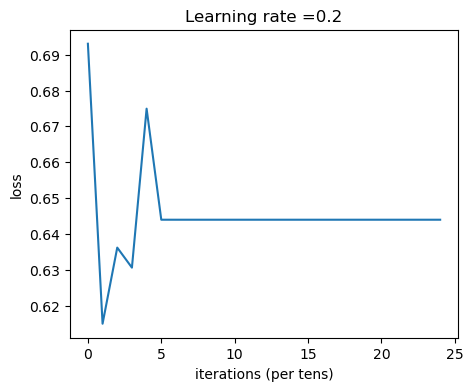

Accuracy: 0.6555023923444976
Accuracy: 0.3400000000000001
lr: 0.5

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.6439754234043242
Loss after iteration 200: 0.643973738052806
Loss after iteration 300: 0.6439737380528059
Loss after iteration 400: 0.6439737380528058
Loss after iteration 500: 0.6439737380528058
Loss after iteration 600: 0.6439737380528058
Loss after iteration 700: 0.6439737380528058
Loss after iteration 800: 0.6439737380528058
Loss after iteration 900: 0.6439737380528058
Loss after iteration 1000: 0.6439737380528058
Loss after iteration 1100: 0.6439737380528058
Loss after iteration 1200: 0.6439737380528058
Loss after iteration 1300: 0.6439737380528058
Loss after iteration 1400: 0.6439737380528058
Loss after iteration 1500: 0.6439737380528058
Loss after iteration 1600: 0.6439737380528058
Loss after iteration 1700: 0.6439737380528058
Loss after iteration 1800: 0.6439737380528058
Loss after iteration 1900: 0.6439737380528058
Loss after iteration 2000:

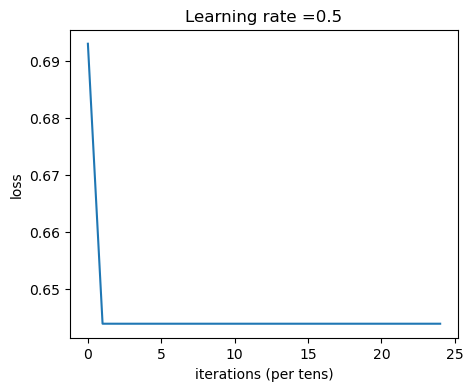

Accuracy: 0.6555023923444976
Accuracy: 0.3400000000000001


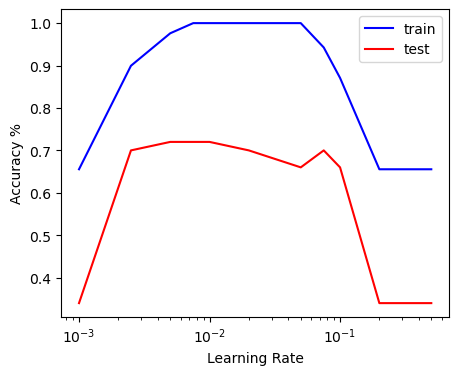

In [42]:
learning_rate_tuning([0.001, 0.0025, 0.005, 0.0075, 0.01, 0.02, 0.05, 0.075, 0.1, .2, .5])

n_h: 1

Loss after iteration 0: 0.6941101134647648
Loss after iteration 100: 0.6506563639694284
Loss after iteration 200: 0.639488125028198
Loss after iteration 300: 0.6174919950039526
Loss after iteration 400: 0.5804608718079809
Loss after iteration 500: 0.5379339910822016
Loss after iteration 600: 0.49558531534543887
Loss after iteration 700: 0.4644469773725118
Loss after iteration 800: 0.43728287341993677
Loss after iteration 900: 0.40577639325565695
Loss after iteration 1000: 0.3779955336808881
Loss after iteration 1100: 0.35561436235004257
Loss after iteration 1200: 0.3304055252850317
Loss after iteration 1300: 0.3043842602089853
Loss after iteration 1400: 0.28660856469419776
Loss after iteration 1500: 0.27801198086334133
Loss after iteration 1600: 0.2609156371735982
Loss after iteration 1700: 0.24497698308599422
Loss after iteration 1800: 0.258546141442299
Loss after iteration 1900: 0.2170975407458244
Loss after iteration 2000: 0.34132741778432785
Loss after iteration 2100: 0.305

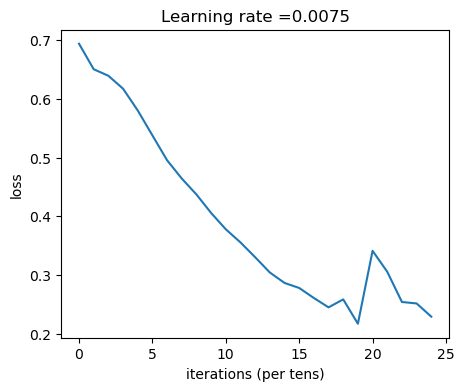

Accuracy: 0.9760765550239232
Accuracy: 0.72
n_h: 2

Loss after iteration 0: 0.6927614985309721
Loss after iteration 100: 0.6464796733091438
Loss after iteration 200: 0.6332912504037146
Loss after iteration 300: 0.6035162957247674
Loss after iteration 400: 0.5629639359949206
Loss after iteration 500: 0.5194512352886311
Loss after iteration 600: 0.47957974187767477
Loss after iteration 700: 0.44801263912134226
Loss after iteration 800: 0.42336671716772406
Loss after iteration 900: 0.3740824279362567
Loss after iteration 1000: 0.361410645211049
Loss after iteration 1100: 0.336821578865507
Loss after iteration 1200: 0.31296717307357047
Loss after iteration 1300: 0.2910699537668737
Loss after iteration 1400: 0.2679507681938651
Loss after iteration 1500: 0.24472067829075886
Loss after iteration 1600: 0.22659371159264333
Loss after iteration 1700: 0.20971212362236707
Loss after iteration 1800: 0.2125578547909683
Loss after iteration 1900: 0.21394048462796855
Loss after iteration 2000: 0.17359

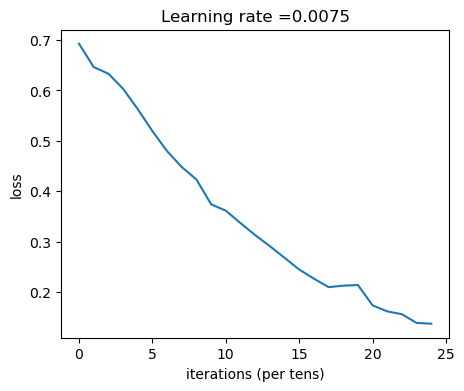

Accuracy: 0.9999999999999998
Accuracy: 0.68
n_h: 4

Loss after iteration 0: 0.6927182928370386
Loss after iteration 100: 0.6465700518695149
Loss after iteration 200: 0.6329742063713907
Loss after iteration 300: 0.602519546384048
Loss after iteration 400: 0.5603485399513062
Loss after iteration 500: 0.5164066060176443
Loss after iteration 600: 0.47608041141633844
Loss after iteration 700: 0.44881031301775476
Loss after iteration 800: 0.407302100751371
Loss after iteration 900: 0.3941794428874614
Loss after iteration 1000: 0.36168126654475696
Loss after iteration 1100: 0.33611066836748366
Loss after iteration 1200: 0.3079309300304774
Loss after iteration 1300: 0.29530566589179785
Loss after iteration 1400: 0.2911640691899969
Loss after iteration 1500: 0.25331084079086247
Loss after iteration 1600: 0.23613682834120014
Loss after iteration 1700: 0.21844998391090462
Loss after iteration 1800: 0.2207698320706502
Loss after iteration 1900: 0.23498571481418715
Loss after iteration 2000: 0.1925

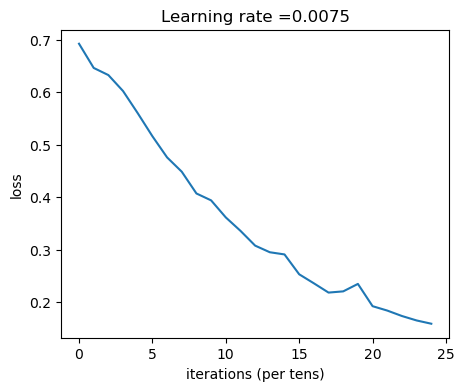

Accuracy: 0.9808612440191385
Accuracy: 0.6600000000000001
n_h: 7

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.6464320953428849
Loss after iteration 200: 0.6325140647912677
Loss after iteration 300: 0.6015024920354666
Loss after iteration 400: 0.5601966311605748
Loss after iteration 500: 0.515830477276473
Loss after iteration 600: 0.4754901313943325
Loss after iteration 700: 0.4339163151225749
Loss after iteration 800: 0.40079775362038866
Loss after iteration 900: 0.35807050113237976
Loss after iteration 1000: 0.3394281538366412
Loss after iteration 1100: 0.30527536361962654
Loss after iteration 1200: 0.2749137728213016
Loss after iteration 1300: 0.24681768210614827
Loss after iteration 1400: 0.19850735037466108
Loss after iteration 1500: 0.17448318112556663
Loss after iteration 1600: 0.1708076297809611
Loss after iteration 1700: 0.1130652456216474
Loss after iteration 1800: 0.09629426845937157
Loss after iteration 1900: 0.08342617959726864
Loss after iteratio

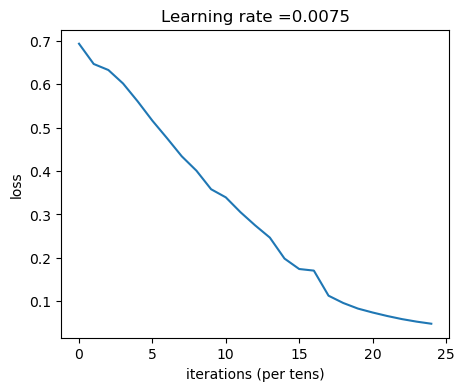

Accuracy: 0.9999999999999998
Accuracy: 0.72
n_h: 10

Loss after iteration 0: 0.6916083489808594
Loss after iteration 100: 0.6462459250321072
Loss after iteration 200: 0.6315595282674906
Loss after iteration 300: 0.5992509690945639
Loss after iteration 400: 0.5572929911160991
Loss after iteration 500: 0.5115831407618792
Loss after iteration 600: 0.4540797347214153
Loss after iteration 700: 0.3977829995292703
Loss after iteration 800: 0.3883480097226898
Loss after iteration 900: 0.3464301394545517
Loss after iteration 1000: 0.3111743356718496
Loss after iteration 1100: 0.25455463973791026
Loss after iteration 1200: 0.23326930902706647
Loss after iteration 1300: 0.17470095327103186
Loss after iteration 1400: 0.1594178591605034
Loss after iteration 1500: 0.12096583563694309
Loss after iteration 1600: 0.10934439359362175
Loss after iteration 1700: 0.08836711792454316
Loss after iteration 1800: 0.07459908301956869
Loss after iteration 1900: 0.05910014516461942
Loss after iteration 2000: 0.05

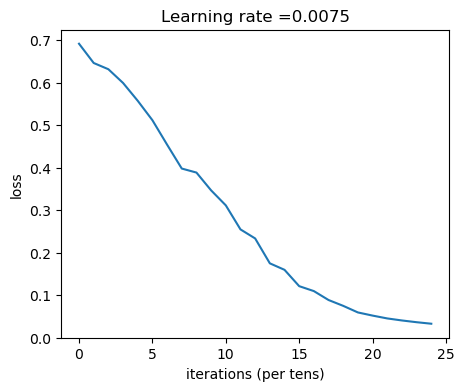

Accuracy: 0.9999999999999998
Accuracy: 0.68
n_h: 15

Loss after iteration 0: 0.6953405956450281
Loss after iteration 100: 0.6463533862793308
Loss after iteration 200: 0.6317227101910382
Loss after iteration 300: 0.5989382148345569
Loss after iteration 400: 0.554324004906146
Loss after iteration 500: 0.5005701549593797
Loss after iteration 600: 0.4359002622184061
Loss after iteration 700: 0.37473404378916336
Loss after iteration 800: 0.353397824085728
Loss after iteration 900: 0.32751201382141587
Loss after iteration 1000: 0.289737903969172
Loss after iteration 1100: 0.24092104227006836
Loss after iteration 1200: 0.21360969365040577
Loss after iteration 1300: 0.15515757484627232
Loss after iteration 1400: 0.2597339390806204
Loss after iteration 1500: 0.10063042312717817
Loss after iteration 1600: 0.08559817946508683
Loss after iteration 1700: 0.06977473835351322
Loss after iteration 1800: 0.05908620259045753
Loss after iteration 1900: 0.051842711765824646
Loss after iteration 2000: 0.04

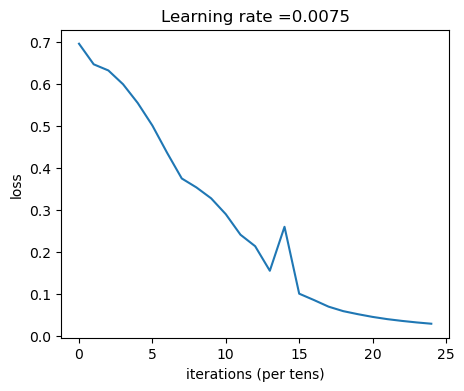

Accuracy: 0.9999999999999998
Accuracy: 0.72
n_h: 20

Loss after iteration 0: 0.6946974987818059
Loss after iteration 100: 0.6446562285644791
Loss after iteration 200: 0.6266068304804404
Loss after iteration 300: 0.5890486353556458
Loss after iteration 400: 0.536055855250956
Loss after iteration 500: 0.4743026415418227
Loss after iteration 600: 0.4084002398169372
Loss after iteration 700: 0.3631190270340645
Loss after iteration 800: 0.35603232069394286
Loss after iteration 900: 0.31780183958660707
Loss after iteration 1000: 0.28723986672247726
Loss after iteration 1100: 0.23237683700863185
Loss after iteration 1200: 0.1747843934847322
Loss after iteration 1300: 0.13729276531868753
Loss after iteration 1400: 0.13257621537349187
Loss after iteration 1500: 0.09926265121399937
Loss after iteration 1600: 0.08325260336176277
Loss after iteration 1700: 0.07152709988399913
Loss after iteration 1800: 0.05893346505590636
Loss after iteration 1900: 0.051111314815043225
Loss after iteration 2000: 0

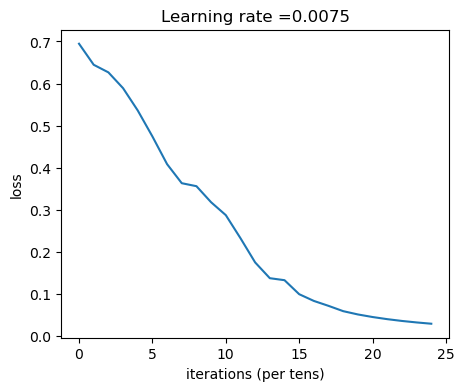

Accuracy: 0.9999999999999998
Accuracy: 0.7200000000000001
n_h: 25

Loss after iteration 0: 0.6931540160980506
Loss after iteration 100: 0.6442314690248488
Loss after iteration 200: 0.6256168888912997
Loss after iteration 300: 0.5875996732287869
Loss after iteration 400: 0.5380662231123745
Loss after iteration 500: 0.47994114909689817
Loss after iteration 600: 0.41849062805788945
Loss after iteration 700: 0.3698367551975587
Loss after iteration 800: 0.34089858372250825
Loss after iteration 900: 0.3063220305546997
Loss after iteration 1000: 0.2556265715017448
Loss after iteration 1100: 0.27161727750519327
Loss after iteration 1200: 0.15909674730575965
Loss after iteration 1300: 0.1363421163181802
Loss after iteration 1400: 0.11496751834041442
Loss after iteration 1500: 0.09969362582812387
Loss after iteration 1600: 0.08091023961318504
Loss after iteration 1700: 0.06572990285942704
Loss after iteration 1800: 0.055735019762063756
Loss after iteration 1900: 0.04878384017106162
Loss after it

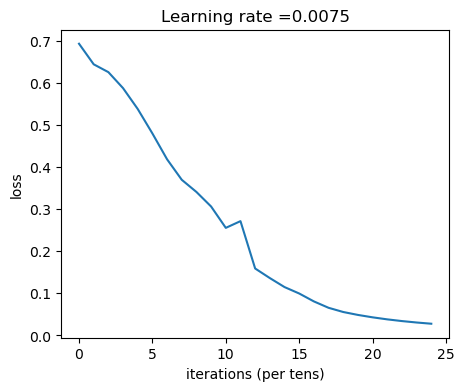

Accuracy: 0.9999999999999998
Accuracy: 0.7
n_h: 30

Loss after iteration 0: 0.6941514634380929
Loss after iteration 100: 0.6424845166840639
Loss after iteration 200: 0.6218347991974132
Loss after iteration 300: 0.5812361959580739
Loss after iteration 400: 0.5279594449996674
Loss after iteration 500: 0.46703423817868683
Loss after iteration 600: 0.4030207884331378
Loss after iteration 700: 0.369283273413762
Loss after iteration 800: 0.35680034816864836
Loss after iteration 900: 0.3249499442724034
Loss after iteration 1000: 0.28857143773216004
Loss after iteration 1100: 0.2536871054962507
Loss after iteration 1200: 0.21971171025665748
Loss after iteration 1300: 0.14560798100365288
Loss after iteration 1400: 0.11160526274267317
Loss after iteration 1500: 0.0986814797034217
Loss after iteration 1600: 0.08209581173412181
Loss after iteration 1700: 0.06785083435234684
Loss after iteration 1800: 0.057943526187670985
Loss after iteration 1900: 0.05074246181707822
Loss after iteration 2000: 0.0

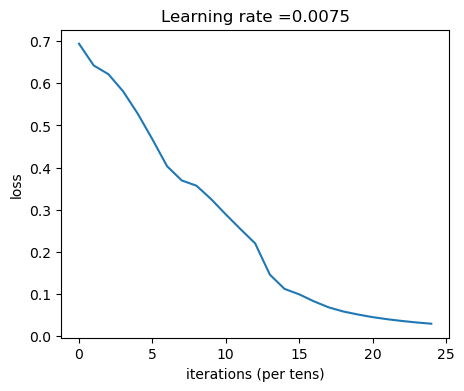

Accuracy: 0.9999999999999998
Accuracy: 0.72
n_h: 40

Loss after iteration 0: 0.6961350498115403
Loss after iteration 100: 0.6405791772223638
Loss after iteration 200: 0.616366097191251
Loss after iteration 300: 0.5725386172339646
Loss after iteration 400: 0.5171105495298048
Loss after iteration 500: 0.4544522589583457
Loss after iteration 600: 0.39190909407482416
Loss after iteration 700: 0.366400384808347
Loss after iteration 800: 0.3453544465397828
Loss after iteration 900: 0.3102043509408558
Loss after iteration 1000: 0.29087359941415086
Loss after iteration 1100: 0.2252362169292904
Loss after iteration 1200: 0.17264386823267983
Loss after iteration 1300: 0.13321331977190887
Loss after iteration 1400: 0.13424521255629768
Loss after iteration 1500: 0.09744519657903297
Loss after iteration 1600: 0.07901039022486478
Loss after iteration 1700: 0.06629435586584785
Loss after iteration 1800: 0.05665386247893062
Loss after iteration 1900: 0.04931959082509402
Loss after iteration 2000: 0.04

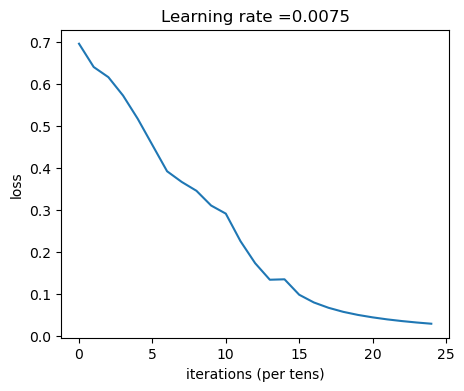

Accuracy: 0.9999999999999998
Accuracy: 0.72
n_h: 50

Loss after iteration 0: 0.6921593042860944
Loss after iteration 100: 0.6385401317610869
Loss after iteration 200: 0.6099046839670684
Loss after iteration 300: 0.5608809219658435
Loss after iteration 400: 0.5009685175161245
Loss after iteration 500: 0.43584013165551333
Loss after iteration 600: 0.371388279933913
Loss after iteration 700: 0.356044229635497
Loss after iteration 800: 0.3294840786975809
Loss after iteration 900: 0.2928382617158991
Loss after iteration 1000: 0.2524589844247023
Loss after iteration 1100: 0.21720066966769566
Loss after iteration 1200: 0.1469509381783646
Loss after iteration 1300: 0.12582216846559346
Loss after iteration 1400: 0.09321610808901616
Loss after iteration 1500: 0.0780040074968208
Loss after iteration 1600: 0.06678105942972172
Loss after iteration 1700: 0.05714952839789637
Loss after iteration 1800: 0.04989776569752013
Loss after iteration 1900: 0.0438189015782015
Loss after iteration 2000: 0.03886

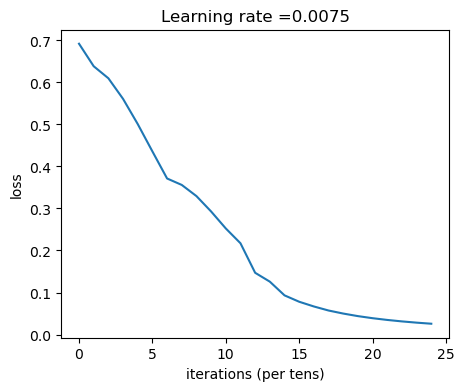

Accuracy: 0.9999999999999998
Accuracy: 0.7


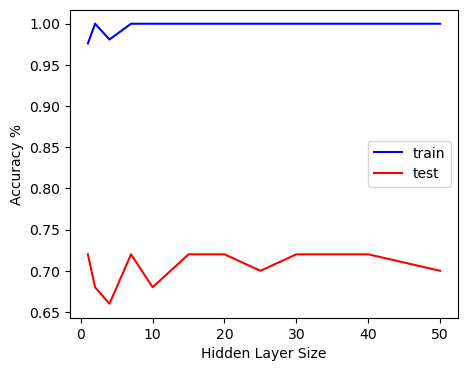

In [43]:
hlayer_size_tuning([1, 2, 4, 7, 10, 15, 20, 25, 30, 40, 50])

Iterations: 100

Loss after iteration 0: 0.6930497356599891


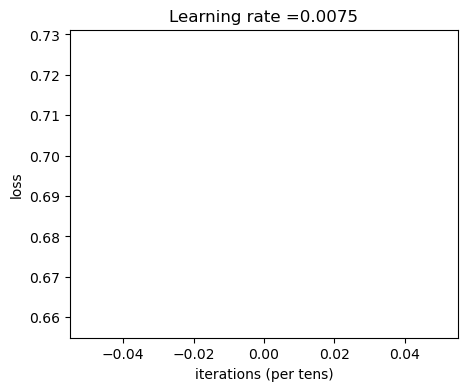

Accuracy: 0.6555023923444976
Accuracy: 0.3400000000000001
Iterations: 200

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.6464320953428849


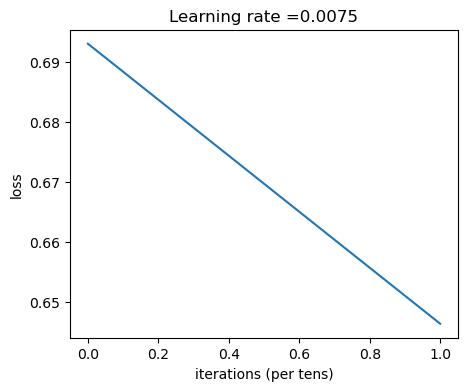

Accuracy: 0.6555023923444976
Accuracy: 0.3400000000000001
Iterations: 500

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.6464320953428849
Loss after iteration 200: 0.6325140647912677
Loss after iteration 300: 0.6015024920354666
Loss after iteration 400: 0.5601966311605748


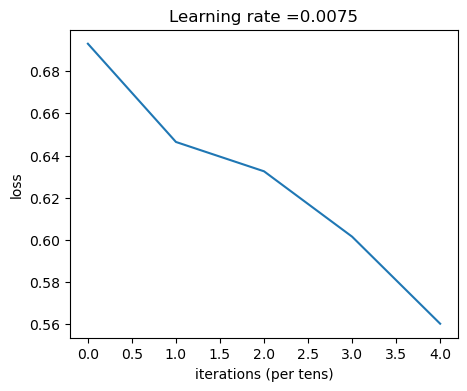

Accuracy: 0.6555023923444976
Accuracy: 0.3400000000000001
Iterations: 750

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.6464320953428849
Loss after iteration 200: 0.6325140647912677
Loss after iteration 300: 0.6015024920354666
Loss after iteration 400: 0.5601966311605748
Loss after iteration 500: 0.515830477276473
Loss after iteration 600: 0.4754901313943325
Loss after iteration 700: 0.4339163151225749


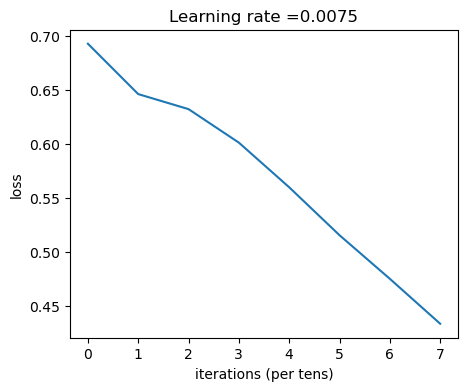

Accuracy: 0.7942583732057416
Accuracy: 0.6000000000000001
Iterations: 1000

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.6464320953428849
Loss after iteration 200: 0.6325140647912677
Loss after iteration 300: 0.6015024920354666
Loss after iteration 400: 0.5601966311605748
Loss after iteration 500: 0.515830477276473
Loss after iteration 600: 0.4754901313943325
Loss after iteration 700: 0.4339163151225749
Loss after iteration 800: 0.40079775362038866
Loss after iteration 900: 0.35807050113237976


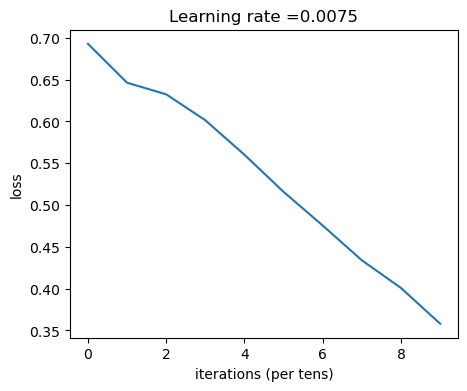

Accuracy: 0.8373205741626794
Accuracy: 0.5800000000000001
Iterations: 1500

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.6464320953428849
Loss after iteration 200: 0.6325140647912677
Loss after iteration 300: 0.6015024920354666
Loss after iteration 400: 0.5601966311605748
Loss after iteration 500: 0.515830477276473
Loss after iteration 600: 0.4754901313943325
Loss after iteration 700: 0.4339163151225749
Loss after iteration 800: 0.40079775362038866
Loss after iteration 900: 0.35807050113237976
Loss after iteration 1000: 0.3394281538366412
Loss after iteration 1100: 0.30527536361962654
Loss after iteration 1200: 0.2749137728213016
Loss after iteration 1300: 0.24681768210614827
Loss after iteration 1400: 0.19850735037466108


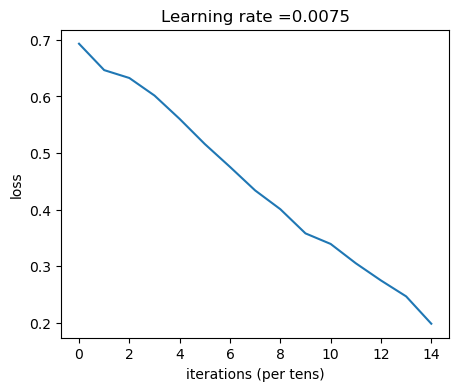

Accuracy: 0.9521531100478466
Accuracy: 0.6799999999999999
Iterations: 2000

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.6464320953428849
Loss after iteration 200: 0.6325140647912677
Loss after iteration 300: 0.6015024920354666
Loss after iteration 400: 0.5601966311605748
Loss after iteration 500: 0.515830477276473
Loss after iteration 600: 0.4754901313943325
Loss after iteration 700: 0.4339163151225749
Loss after iteration 800: 0.40079775362038866
Loss after iteration 900: 0.35807050113237976
Loss after iteration 1000: 0.3394281538366412
Loss after iteration 1100: 0.30527536361962654
Loss after iteration 1200: 0.2749137728213016
Loss after iteration 1300: 0.24681768210614827
Loss after iteration 1400: 0.19850735037466108
Loss after iteration 1500: 0.17448318112556663
Loss after iteration 1600: 0.1708076297809611
Loss after iteration 1700: 0.1130652456216474
Loss after iteration 1800: 0.09629426845937157
Loss after iteration 1900: 0.08342617959726864


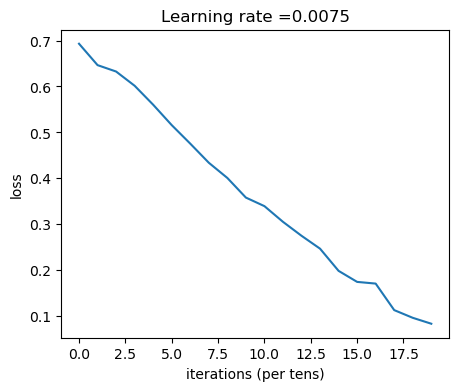

Accuracy: 0.9856459330143539
Accuracy: 0.72
Iterations: 3000

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.6464320953428849
Loss after iteration 200: 0.6325140647912677
Loss after iteration 300: 0.6015024920354666
Loss after iteration 400: 0.5601966311605748
Loss after iteration 500: 0.515830477276473
Loss after iteration 600: 0.4754901313943325
Loss after iteration 700: 0.4339163151225749
Loss after iteration 800: 0.40079775362038866
Loss after iteration 900: 0.35807050113237976
Loss after iteration 1000: 0.3394281538366412
Loss after iteration 1100: 0.30527536361962654
Loss after iteration 1200: 0.2749137728213016
Loss after iteration 1300: 0.24681768210614827
Loss after iteration 1400: 0.19850735037466108
Loss after iteration 1500: 0.17448318112556663
Loss after iteration 1600: 0.1708076297809611
Loss after iteration 1700: 0.1130652456216474
Loss after iteration 1800: 0.09629426845937157
Loss after iteration 1900: 0.08342617959726864
Loss after iteration 20

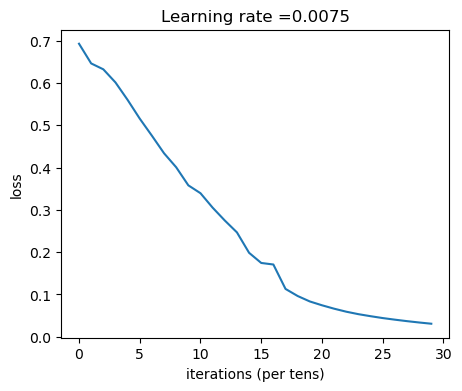

Accuracy: 0.9999999999999998
Accuracy: 0.72
Iterations: 4000

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.6464320953428849
Loss after iteration 200: 0.6325140647912677
Loss after iteration 300: 0.6015024920354666
Loss after iteration 400: 0.5601966311605748
Loss after iteration 500: 0.515830477276473
Loss after iteration 600: 0.4754901313943325
Loss after iteration 700: 0.4339163151225749
Loss after iteration 800: 0.40079775362038866
Loss after iteration 900: 0.35807050113237976
Loss after iteration 1000: 0.3394281538366412
Loss after iteration 1100: 0.30527536361962654
Loss after iteration 1200: 0.2749137728213016
Loss after iteration 1300: 0.24681768210614827
Loss after iteration 1400: 0.19850735037466108
Loss after iteration 1500: 0.17448318112556663
Loss after iteration 1600: 0.1708076297809611
Loss after iteration 1700: 0.1130652456216474
Loss after iteration 1800: 0.09629426845937157
Loss after iteration 1900: 0.08342617959726864
Loss after iteration 20

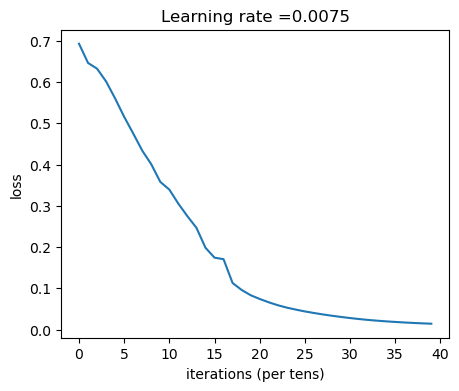

Accuracy: 0.9999999999999998
Accuracy: 0.7000000000000001
Iterations: 5000

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.6464320953428849
Loss after iteration 200: 0.6325140647912677
Loss after iteration 300: 0.6015024920354666
Loss after iteration 400: 0.5601966311605748
Loss after iteration 500: 0.515830477276473
Loss after iteration 600: 0.4754901313943325
Loss after iteration 700: 0.4339163151225749
Loss after iteration 800: 0.40079775362038866
Loss after iteration 900: 0.35807050113237976
Loss after iteration 1000: 0.3394281538366412
Loss after iteration 1100: 0.30527536361962654
Loss after iteration 1200: 0.2749137728213016
Loss after iteration 1300: 0.24681768210614827
Loss after iteration 1400: 0.19850735037466108
Loss after iteration 1500: 0.17448318112556663
Loss after iteration 1600: 0.1708076297809611
Loss after iteration 1700: 0.1130652456216474
Loss after iteration 1800: 0.09629426845937157
Loss after iteration 1900: 0.08342617959726864
Loss afte

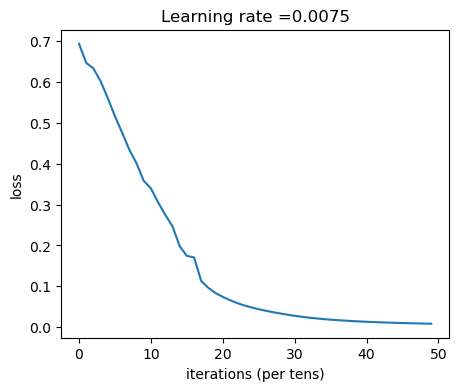

Accuracy: 0.9999999999999998
Accuracy: 0.7000000000000001
Iterations: 7500

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.6464320953428849
Loss after iteration 200: 0.6325140647912677
Loss after iteration 300: 0.6015024920354666
Loss after iteration 400: 0.5601966311605748
Loss after iteration 500: 0.515830477276473
Loss after iteration 600: 0.4754901313943325
Loss after iteration 700: 0.4339163151225749
Loss after iteration 800: 0.40079775362038866
Loss after iteration 900: 0.35807050113237976
Loss after iteration 1000: 0.3394281538366412
Loss after iteration 1100: 0.30527536361962654
Loss after iteration 1200: 0.2749137728213016
Loss after iteration 1300: 0.24681768210614827
Loss after iteration 1400: 0.19850735037466108
Loss after iteration 1500: 0.17448318112556663
Loss after iteration 1600: 0.1708076297809611
Loss after iteration 1700: 0.1130652456216474
Loss after iteration 1800: 0.09629426845937157
Loss after iteration 1900: 0.08342617959726864
Loss afte

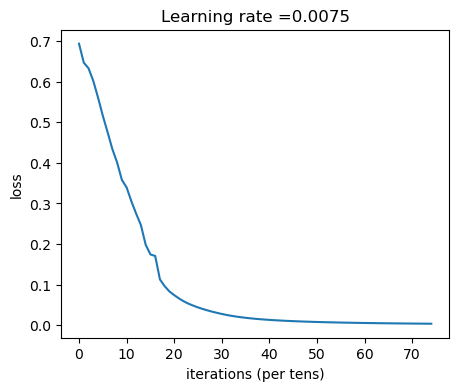

Accuracy: 0.9999999999999998
Accuracy: 0.7200000000000001
Iterations: 10000

Loss after iteration 0: 0.6930497356599891
Loss after iteration 100: 0.6464320953428849
Loss after iteration 200: 0.6325140647912677
Loss after iteration 300: 0.6015024920354666
Loss after iteration 400: 0.5601966311605748
Loss after iteration 500: 0.515830477276473
Loss after iteration 600: 0.4754901313943325
Loss after iteration 700: 0.4339163151225749
Loss after iteration 800: 0.40079775362038866
Loss after iteration 900: 0.35807050113237976
Loss after iteration 1000: 0.3394281538366412
Loss after iteration 1100: 0.30527536361962654
Loss after iteration 1200: 0.2749137728213016
Loss after iteration 1300: 0.24681768210614827
Loss after iteration 1400: 0.19850735037466108
Loss after iteration 1500: 0.17448318112556663
Loss after iteration 1600: 0.1708076297809611
Loss after iteration 1700: 0.1130652456216474
Loss after iteration 1800: 0.09629426845937157
Loss after iteration 1900: 0.08342617959726864
Loss aft

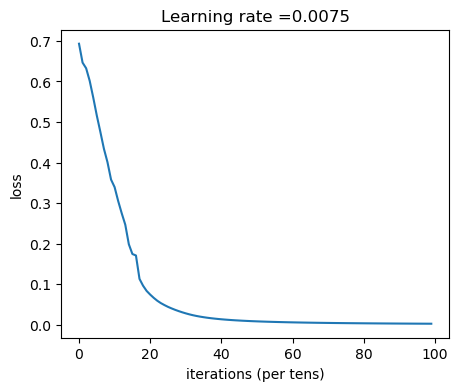

Accuracy: 0.9999999999999998
Accuracy: 0.7200000000000001


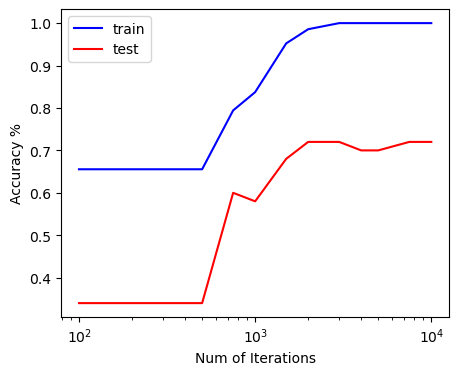

In [48]:
iterations_tuning([100, 200, 500, 750, 1000, 1500, 2000, 3000, 4000, 5000, 7500, 10000])

## 8. Explore and Explain Hyperparameters

***Exercise:***
Identify the hyperparameters in the model and For each hyperparameter
- Briefly explain its role
- Explore a range of values and describe their impact on (a) training loss and (b) test accuracy
- Report the best hyperparameter value found.

Note: Provide your results and explanations in the answer for this question.

1. Learning rate
    1. The learning rate determines the rate of gradient descent. A learning rate that is too low can cause convergence to take too long, while a learning rate that is too high can prevent convergence.
    2. In the learning rate testing above, the greatest train accuracy was achieved with learning rates between 0.0075 and 0.05, and the greatest test accuracy was achieved with learning rates between 0.005 and 0.02.
    3. Thus the optimal learning rate is between 0.0075 and 0.02; we'll go with 0.01.
2. Hidden layer size
    1. The size of the hidden layer determines how many intermediate nodes there are. A too small hidden layer can cause underfitting, while a too large hidden layer can cause overfitting. Additionally, the larger the hidden layer, the more parameters there are, and thus the longer the network takes to train.
    2. In the layer size testing I performed, we did not reach the point at which increasing the layer size causes overfitting, but the network did take longer to train as the layer increased in size. The maximum train and test accuracy were achieved with layer size greater than or equal to 15.
    3. The optimal hidden layer size is 15, because it is the smallest value that achieves the maximum train and test accuracy.
3. Iterations
    1. The number of iterations determines how closely the model matches the training data. Training for too few can cause underfitting, while training for too many can cause overfitting. Additionally, the more iterations undergone, the longer the network takes to train.
    2. In the iterations testing I performed, we did not reach the point at which increasing the iterations causes overfitting, but the network did take longer to train as iterations increased. The maximum train and test accuracy were achieved at 3000 iterations.
    3. The optimal number of iterations is 3000, because it is the smallest value that achieves the maximum train and test accuracy.

##  9. Analyze Image Classification Results

First, let's take a look at some images the 2-layer model labeled incorrectly. This will show a few mislabeled images.

In [155]:
def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))

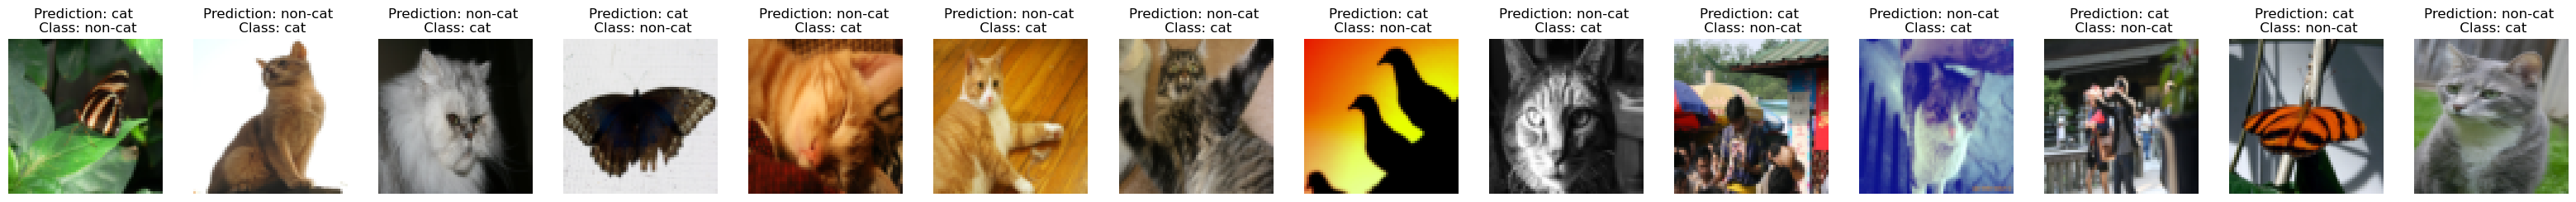

In [156]:
print_mislabeled_images(classes, test_x, test_y, predictions_test)

***Exercise:*** Identify a few types of images that tends to perform poorly on the model

The model seems to mis-classify butterflies as cats relatively often. It also seems that cats that are not fully in the frame are likely to be mis-classified as non-cats.

#  Part 3: Predict Movie Review Sentiment

Now, lets use the same architecture to predict sentiment of movie reviews. In this section, most of the implementation is already provided. The exercises are mainly to understand what the workflow is when handling the text data.

## Datatset

**Problem Statement**: You are given a dataset ("train_imdb.txt", "test_imdb.txt") containing:
    - a training set of m_train reviews 
    - a test set of m_test reviews 
    - the labels for the training examples are such that the first 50% belong to class 1 (positive) and the rest 50% of the data belong to class 0(negative)
    
Let's get more familiar with the dataset. Load the data by completing the function and run the cell below.

In [157]:
def load_data(train_file, test_file):
    train_dataset = []
    test_dataset = []
    
    # Read the training dataset file line by line
    for line in open(train_file, 'r'):
        train_dataset.append(line.strip())
        
    for line in open(test_file, 'r'):
        test_dataset.append(line.strip())
    return train_dataset, test_dataset

In [158]:
train_file = "data/train_imdb.txt"
test_file = "data/test_imdb.txt"
train_dataset, test_dataset = load_data(train_file, test_file)

In [159]:
# This is just how the data is organized. The first 50% data is positive and the rest 50% is negative for both train and test splits.
y = [1 if i < len(train_dataset)*0.5 else 0 for i in range(len(train_dataset))]

As usual, lets check our dataset 

In [160]:
# Example of a review
index = 10
print(train_dataset[index])
print ("y = " + str(y[index]))

I liked the film. Some of the action scenes were very interesting, tense and well done. I especially liked the opening scene which had a semi truck in it. A very tense action scene that seemed well done.<br /><br />Some of the transitional scenes were filmed in interesting ways such as time lapse photography, unusual colors, or interesting angles. Also the film is funny is several parts. I also liked how the evil guy was portrayed too. I'd give the film an 8 out of 10.
y = 1


In [161]:
# Explore your dataset 
m_train = len(train_dataset)
m_test = len(test_dataset)

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))

Number of training examples: 1001
Number of testing examples: 201


## 10. Pre-Processing

From the example review, you can see that the raw data is really noisy! This is generally the case with the text data. Hence, Preprocessing the raw input and cleaning the text is  essential. Please run the code snippet provided below.

**Exercise**: Explain what pattern the model is trying to capture using re.compile.

REPLACE_NO_SPACE captures the symbols {. ; : ! ' ? , " ( ) [ ]} and any numbers so that they can be removed.
REPLACE_WITH_SPACE captures the symbols {<br/><br/> - /}, with any amount of whitespace in the line breaks, so that they can be replaced with spaces.

In [162]:
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_reviews(reviews):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews

train_dataset_clean = preprocess_reviews(train_dataset)
test_dataset_clean = preprocess_reviews(test_dataset)

In [163]:
# Example of a clean review
index = 10
print(train_dataset_clean[index])
print ("y = " + str(y[index]))

i liked the film some of the action scenes were very interesting tense and well done i especially liked the opening scene which had a semi truck in it a very tense action scene that seemed well done some of the transitional scenes were filmed in interesting ways such as time lapse photography unusual colors or interesting angles also the film is funny is several parts i also liked how the evil guy was portrayed too id give the film an  out of 
y = 1


## Vectorization

Now lets create a feature vector for our reviews based on a simple bag of words model. So, given an input text, we need to create a numerical vector which is simply the vector of word counts for each word of the vocabulary. Run the code below to get the feature representation.

In [164]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True, stop_words="english", max_features=2000)
cv.fit(train_dataset_clean)
X = cv.transform(train_dataset_clean)
X_test = cv.transform(test_dataset_clean)

CountVectorizer provides a sparse feature representation by default which is reasonable because only some words occur in individual example. However, for training neural network models, we generally use a dense representation vector.

In [165]:
X = np.array(X.todense()).astype(float)
X_test = np.array(X_test.todense()).astype(float)
y = np.array(y)

## Model

In [166]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train_words, X_val_words, y_train, y_val = train_test_split(
    train_dataset_clean, y, train_size = 0.80
)
X_train = cv.transform(X_train_words)
X_val = cv.transform(X_val_words)

In [167]:
# This is just to correct the shape of the arrays as required by the two_layer_model
X_train = X_train.T
X_val = X_val.T
y_train = y_train.reshape(1,-1)
y_val = y_val.reshape(1,-1)

In [168]:
### CONSTANTS DEFINING THE MODEL ####
n_x = X_train.shape[0]    
n_h = 200
n_y = 1
layers_dims = (n_x, n_h, n_y)

We will use the same two layer model that you completed in the previous section for training.

Loss after iteration 0: 0.6930794161691755
Loss after iteration 100: 0.6924189883930234
Loss after iteration 200: 0.6917299099010245
Loss after iteration 300: 0.6909631994851958
Loss after iteration 400: 0.6900696124661577
Loss after iteration 500: 0.6889857497852679
Loss after iteration 600: 0.6876313042490358
Loss after iteration 700: 0.6858995050819006
Loss after iteration 800: 0.6836433757666437
Loss after iteration 900: 0.6806944098529379
Loss after iteration 1000: 0.6768344235615344
Loss after iteration 1100: 0.6717776194654769
Loss after iteration 1200: 0.6651747052958659
Loss after iteration 1300: 0.6565768499459688
Loss after iteration 1400: 0.6455287094427018
Loss after iteration 1500: 0.6315360423581516
Loss after iteration 1600: 0.6142148671677762
Loss after iteration 1700: 0.5933439014258891
Loss after iteration 1800: 0.5689508930530667
Loss after iteration 1900: 0.5414011334400632
Loss after iteration 2000: 0.5114390330601706
Loss after iteration 2100: 0.4800964388047515


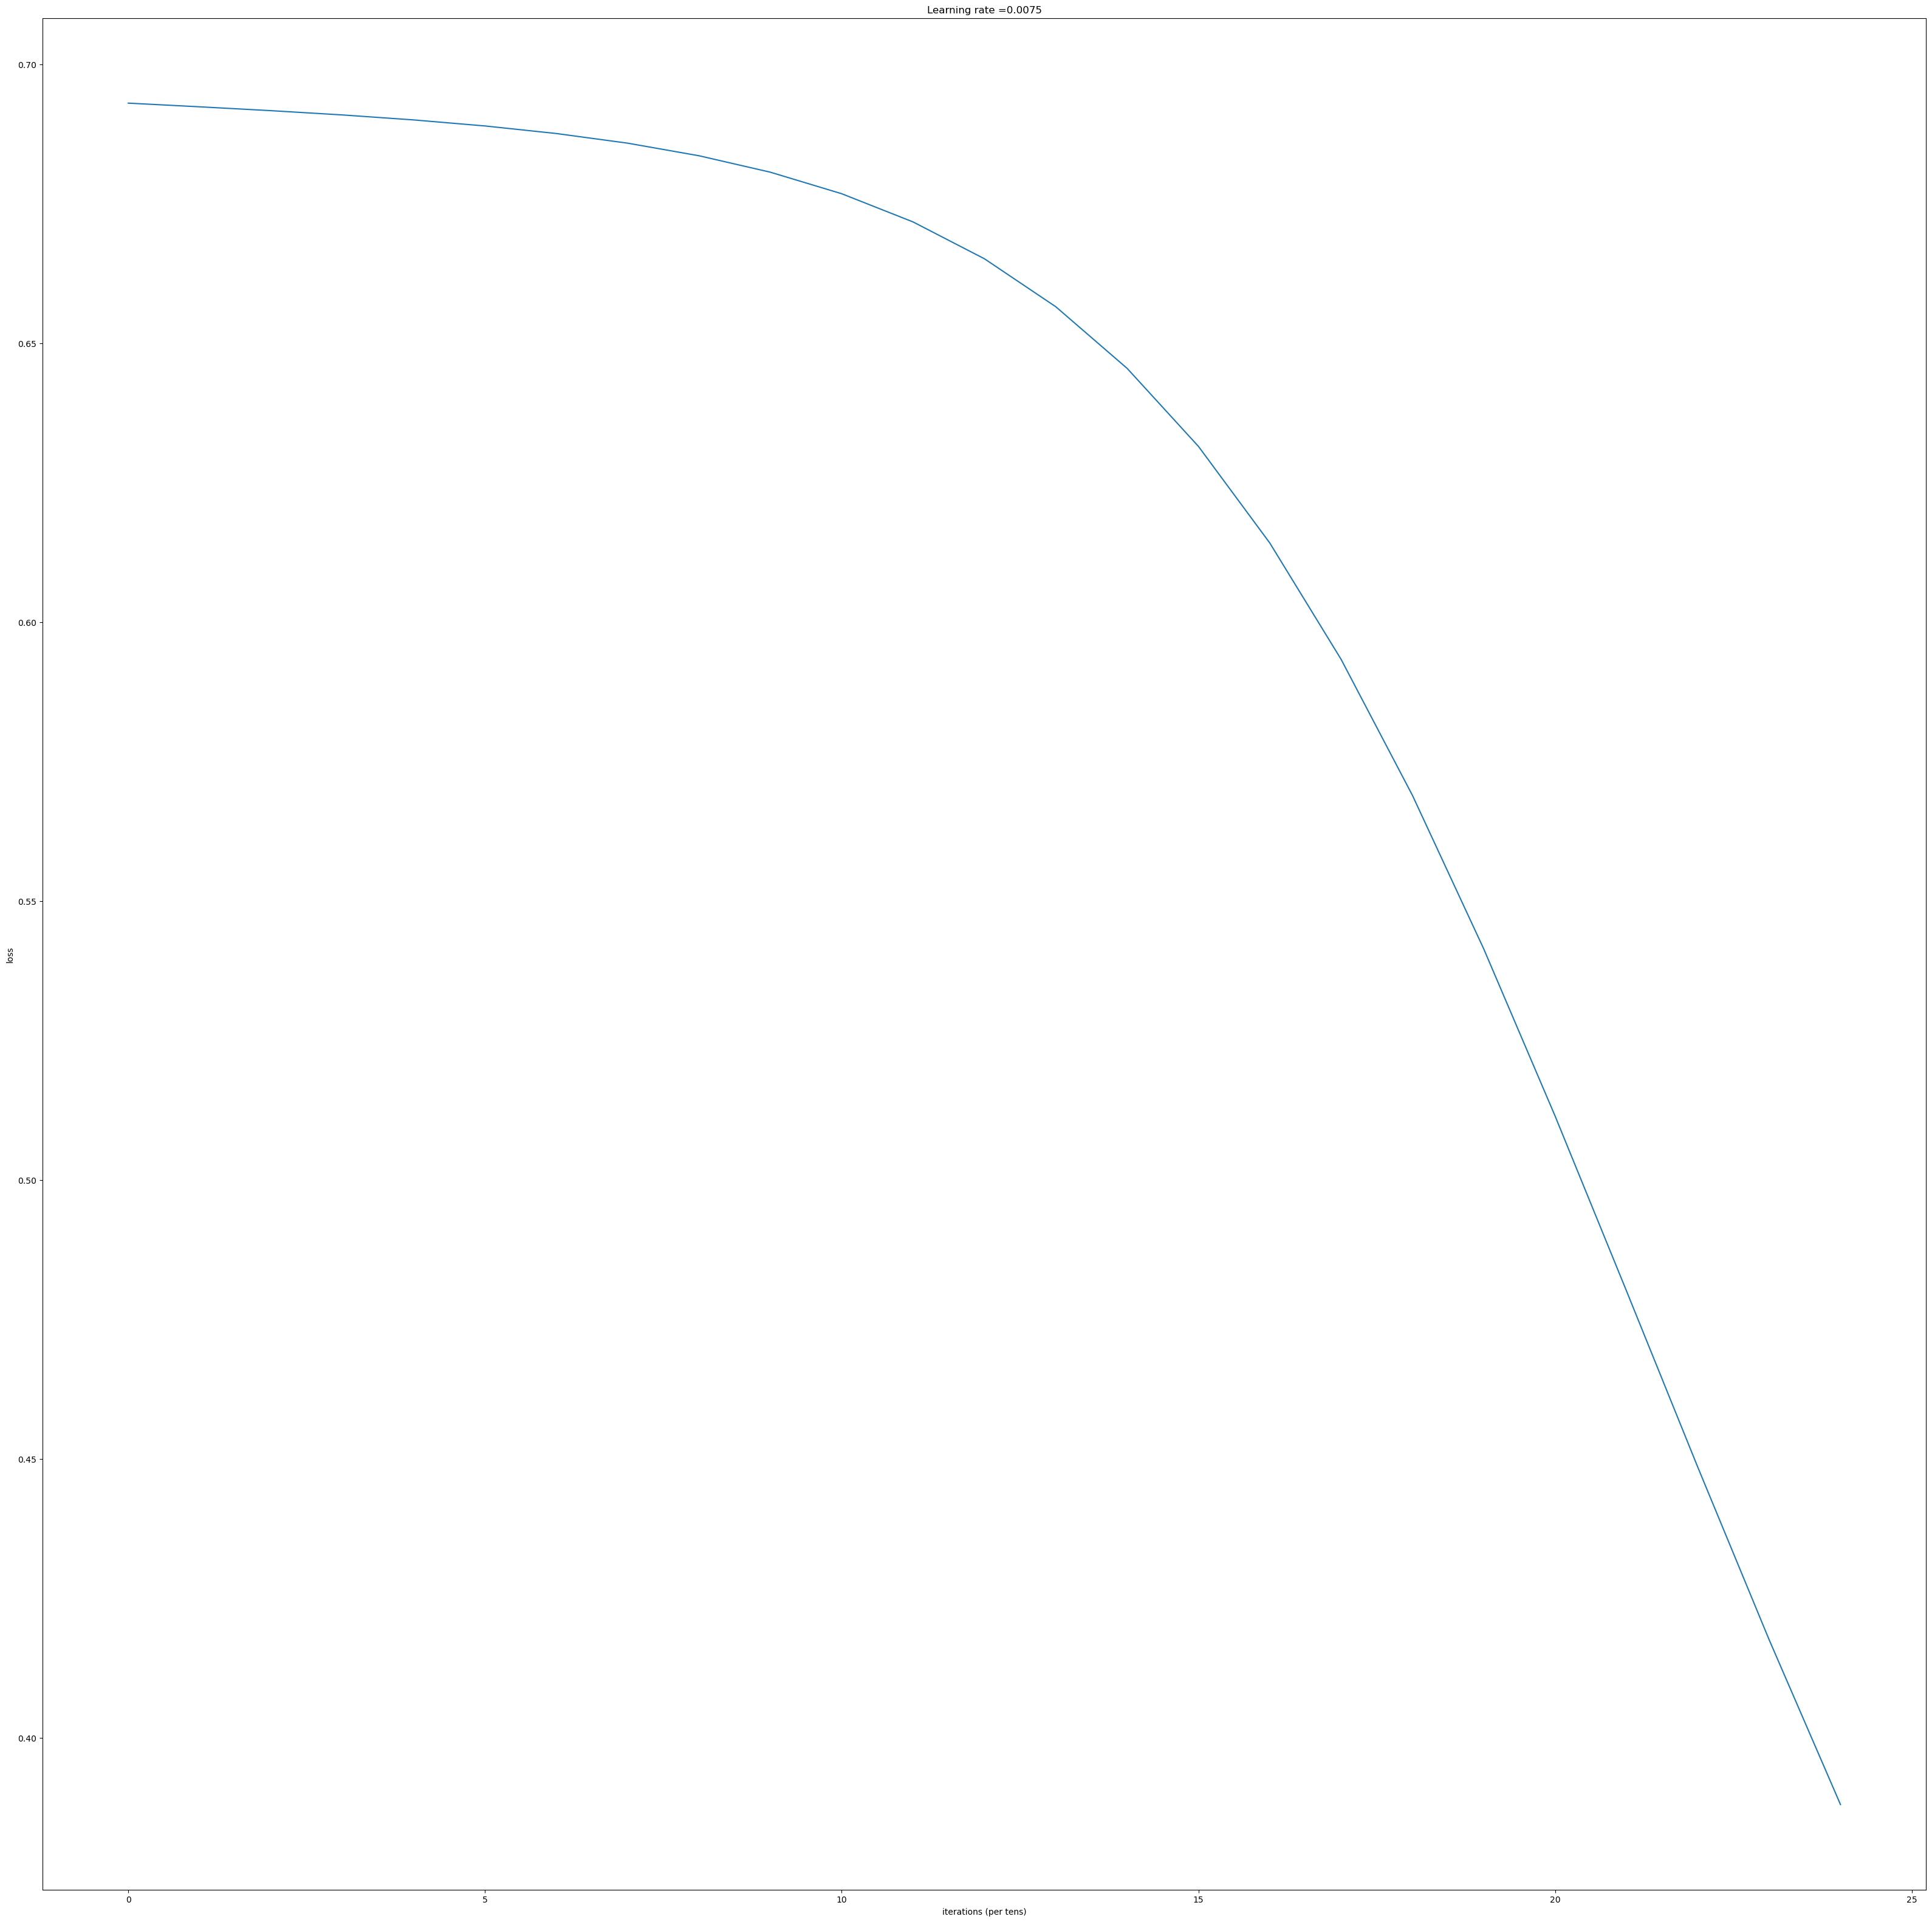

In [169]:
parameters = two_layer_model(X_train, y_train, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_loss=True)

## Predict the review for our movies!

In [170]:
predictions_train = predict(X_train, y_train, parameters)

Accuracy: 0.9324999999999999


In [171]:
predictions_val = predict(X_val, y_val, parameters)

Accuracy: 0.8457711442786067


##  11. Analyze Sentiment Results

Let's take a look at some examples the 2-layer model labeled incorrectly

In [172]:
def print_mislabeled_reviews(X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_reviews = len(mislabeled_indices[0])
    for i in range(num_reviews):
        index = mislabeled_indices[1][i]
        print(X[index])
        # print((" ").join(cv.inverse_transform(X[index].reshape(1, -1))[0]))
        print("Prediction: " + str(int(p[0,index])) + " \n Class: " + str(y[0,index]))

In [173]:
print_mislabeled_reviews(X_val_words, y_val, predictions_val)

without kirsten miller this project neednt have been completed however with the awe inspiring beauty and talent that is miss miller i would definitely recommend it it looked as if the other actors were only playing to her strong performance wagners dismal attempt to honor this film was a bit disappointing but his few scenes didnt detract from being entertained mostly my criticisms are with the writing and plot line the group of talent assembled did a heroic job of salvaging what should have been a disaster the charismatic miller delivery and timing were impeccable and believable she plays that fine line between assertive and bossy but never offensive she is in fact the structural engineer she claims to be i wish i had seen this on the big screen but alas i was fortunate to rent it before it was lost
Prediction: 0 
 Class: 1
a lot of people unfairly sht on this series but several of the guinea pig videos are fairly entertaining devils experiment in particular has some really fantastic e

**Exercise**: Provide explanation as to why these examples were misclassified below.

Misclassified reviews typically use negative words to express positive ideas, or vice-versa. For example, the first review includes the words "needn't", "dismal", "disappointing", "detract", "salvaging", "disaster", "offensive" etc. but these are used as a contrast to either other reviews or concerns that viewers might have about the movie. The author is intending to write a comprehensive review that addresses both of these. However, the vectorizer does not take into acount the order or relative location of words, only how many of each word is present, so the presence of these words makes it mistake the review for negative.